In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from metpy.plots import USCOUNTIES
import geopandas
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
from dateutil import tz
import glob

%matplotlib inline

In [2]:
# Read in Shapefile
forecast_points = geopandas.read_file(glob.glob('data/national_shapefile_fcst*.shp')[0])

minor = forecast_points[forecast_points['Status'] == 'minor']
moderate = forecast_points[forecast_points['Status'] == 'moderate']
major = forecast_points[forecast_points['Status'] == 'major']

In [3]:
# Set Coordinate Reference System for the map
map_crs = ccrs.Mercator()

# Set Coordinate Reference System from the Shapefile Data
data_crs = ccrs.PlateCarree()

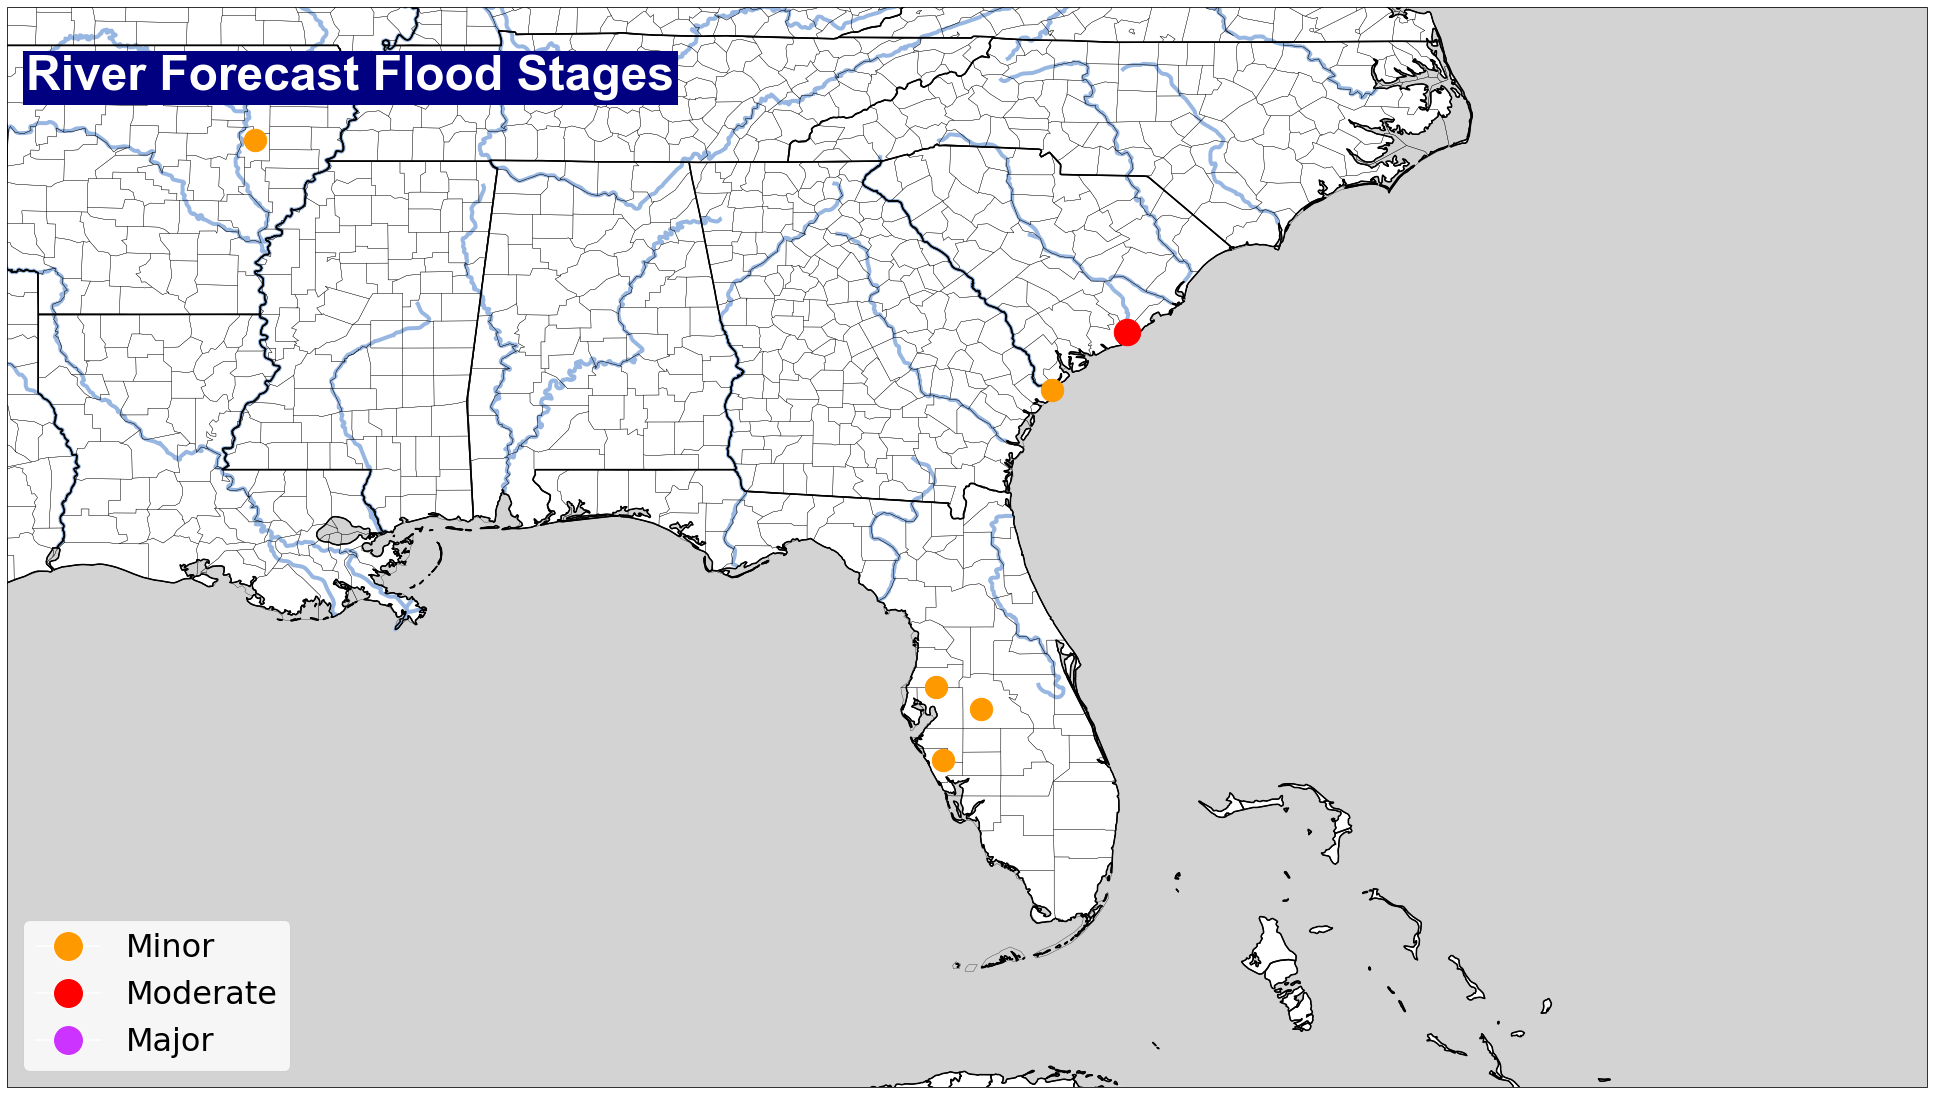

In [4]:
# Setup matplotlib figure
fig = plt.figure(figsize=(1920/72, 1080/72))
ax = fig.add_axes([0, 0, 1, 1], projection=data_crs)

ax.set_extent([-89, -75, 23, 37], data_crs)
ax.set_adjustable('datalim')

# Setup borders (states, countries, coastlines, etc)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.OCEAN.with_scale('10m'), color='lightgray')
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor='black', zorder=5, linewidth=0.3)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=1.5, zorder=10)
ax.add_feature(cfeature.RIVERS.with_scale('10m'), linewidth=4.0)


# Plot River Flood Stages

ax.scatter([point for point in minor['Longitude']],
           [point for point in minor['Latitude']],
           c='#ff9900', marker='o', s=500, zorder=11, transform=data_crs)

ax.scatter([point for point in moderate['Longitude']],
           [point for point in moderate['Latitude']],
           c='#ff0000', marker='o', s=700, zorder=11, transform=data_crs)

ax.scatter([point for point in major['Longitude']],
           [point for point in major['Latitude']],
           c='#cc33ff', marker='o', s=900, zorder=11, transform=data_crs)

# Plot the legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Minor',
                          markerfacecolor='#ff9900', markersize=30),
                   Line2D([0], [0], marker='o', color='w', label='Moderate',
                          markerfacecolor='#ff0000', markersize=30),
                   Line2D([0], [0], marker='o', color='w', label='Major',
                          markerfacecolor='#cc33ff', markersize=30)]

ax.legend(handles=legend_elements, fontsize=32, loc='lower left',)
        
# Set title
ax.set_title(f'River Forecast Flood Stages', loc='left', 
             ha='left', va='top', fontsize=48, color='white', 
             fontweight='bold', fontname='Arial', y=0.95, x=0.01, zorder=11,
             bbox=dict(facecolor='navy', alpha=1.0, edgecolor='none'))

# Save figure to the disk
graphics_dir = Path('.') / '..' / '..' / 'graphics' / 'hydro'
plt.savefig(f'{graphics_dir}/flood_river-stages.png', dpi=72)